# DS4320 Midterm

On my honor as a student, I have neither given nor received unauthorized aid on this assignment/examination.

Dailin Li

In [19]:
# Import necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn


# 1. Create and Evaluate Synthetic Data

## 1.1 Data Generator

Confidence: 6

In [ ]:
raw = pd.read_csv("question-1.csv")

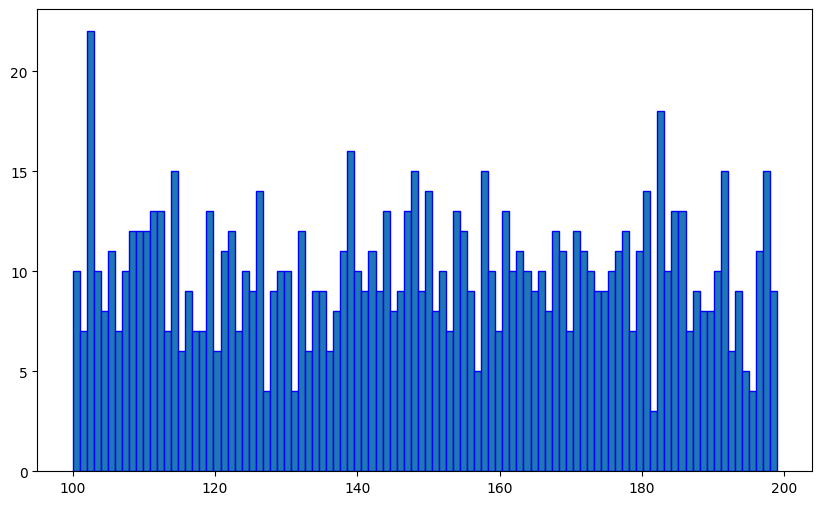

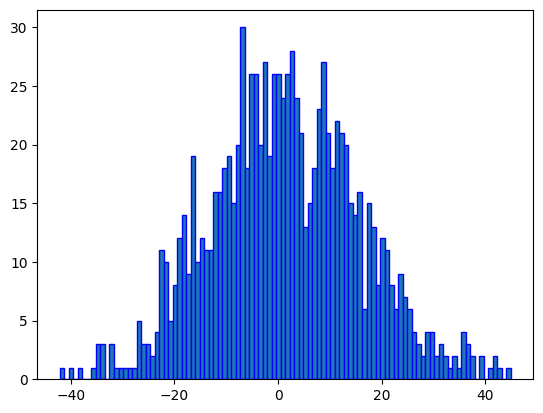

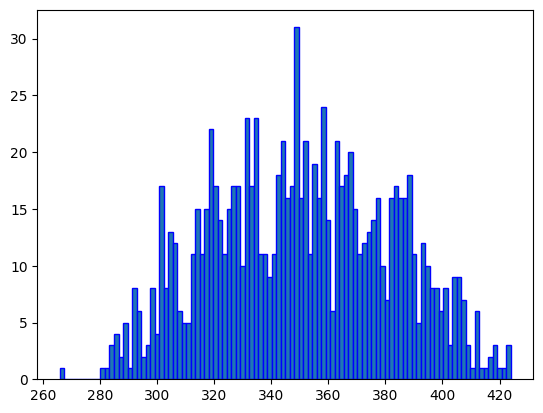

In [ ]:
plt.figure(figsize=(10, 6))
for col in raw.columns:
        plt.hist(raw[col], bins=100, edgecolor='blue')
        plt.show()

From the histograms from all three columns it's visible that column 2 and 3 follow a normal distribution and column 1 follows a near-uniform distribution.

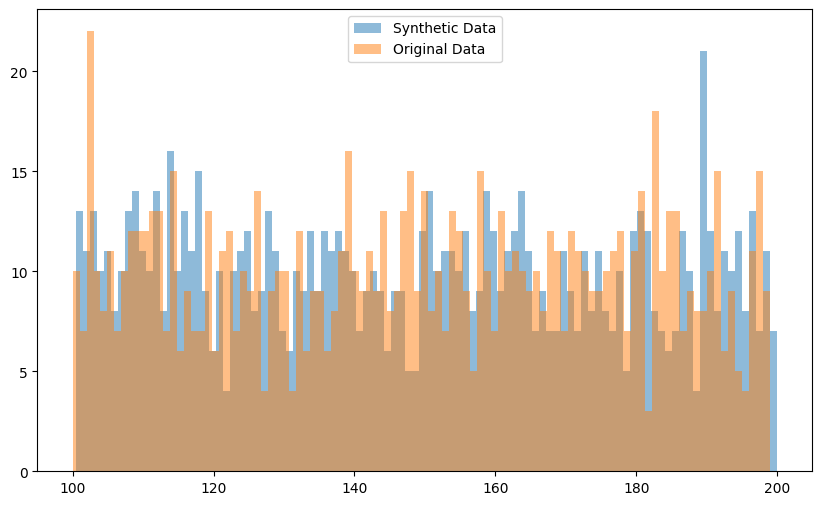

In [ ]:
plt.figure(figsize=(10, 6))

rng = np.random.RandomState(42)

col1_resim = rng.uniform(low=100, high=200, size=1000)

plt.hist(col1_resim, bins=100, alpha=0.5, label='Synthetic Data')
plt.hist(raw['col1'], bins=100, alpha=0.5, label='Original Data')
plt.legend()
plt.show()


In [ ]:
# Check the standard deviation and mean of column 2 and 3 for simulation
std_col2 = raw['col2'].std()
mean_col2 = raw['col2'].mean()

print(f"Standard deviation of column 2: {std_col2}")
print(f"Mean of column 2: {mean_col2}")


Standard deviation of column 2: 14.400191969433989
Mean of column 2: 1.286383642069057


In [ ]:
# To check the relationship between the columns
raw['difference'] = raw['col3'] - raw['col2'] - raw['col1']

column_difference = raw['difference'].std()
column_mean = raw['difference'].mean()
column_info = raw['difference'].describe()

print(f"Standard deviation of column difference: {column_difference}")
print(f"Mean of column difference: {column_mean}")
print(f"Information about column difference: {column_info}")


Standard deviation of column difference: 2.7393116159705535e-14
Mean of column difference: 200.0
Information about column difference: count    1.000000e+03
mean     2.000000e+02
std      2.739312e-14
min      2.000000e+02
25%      2.000000e+02
50%      2.000000e+02
75%      2.000000e+02
max      2.000000e+02
Name: difference, dtype: float64


It could be deducted that col1 + col2 + 200 = col3

In [ ]:
def data_generator(n=10):
    rng = np.random.RandomState(42)
    sim_col1 = rng.uniform(low=100, high=200, size=n)
    sim_col2 = rng.normal(loc=raw['col2'].mean(), scale=raw['col2'].std(), size=n)

    # Add noise to the data
    noise = rng.normal(loc=0, scale=5, size=n)

    sim_col3 = sim_col1 + sim_col2 + 200 + noise

    return pd.DataFrame({'col1': sim_col1, 'col2': sim_col2, 'col3': sim_col3})

# 1.2

Confidence: 7

In [ ]:
def data_generator(n=10):
    """
    Generate synthetic rows that mimic the structure of question-1.csv.

    The generator uses a simple parametric model estimated from the original
    data. It models `col2` as Gaussian (normal) random variables
    with means and standard deviations taken from the given CSV and `col1` as a uniform distribution, and then
    constructs `col3` so that it approximately satisfies the relationship
    col3 ≈ col1 + col2 + 200, with an added Gaussian noise term.

    Parameters
    ----------
    n : int, optional
        Number of synthetic rows to generate. Default is 10.

    Returns
    -------
    pandas.DataFrame
        A DataFrame with `n` rows and three columns:
        - 'col1' : float
            Synthetic first column, sampled from a uniform distribution.
        - 'col2' : float
            Synthetic second column, sampled from a normal distribution with
            mean and standard deviation estimated from the original `col2`.
        - 'col3' : float
            Synthetic third column, approximately satisfying
            `col3 = col1 + col2 + 200` with added noise.

    Notes
    -----
    This function uses a fixed random seed (`RandomState(42)`) so that it
    produces the same synthetic sample each time it is called with the same
    value of `n`. The model is intentionally simple: it assumes that `col1` 
    is a uniform distribution and `col2` is approximately normal and that 
    the deterministic relationship `col3 = col1 + col2 + 200` holds up to 
    an additive Gaussian noise term.
    """
    rng = np.random.RandomState(42)
    sim_col1 = rng.uniform(low=100, high=200, size=n)
    sim_col2 = rng.normal(loc=raw['col2'].mean(), scale=raw['col2'].std(), size=n)

    # Add noise to the data
    noise = rng.normal(loc=0, scale=5, size=n)

    sim_col3 = sim_col1 + sim_col2 + 200 + noise

    return pd.DataFrame({'col1': sim_col1, 'col2': sim_col2, 'col3': sim_col3})

The function data_generator(n=10) produces n rows of synthetic data that mimic the structure and basic distributional properties of question-1.csv.

- It first estimates the mean and standard deviation of col2 from the original data.
- It then samples synthetic col2 values from a normal distribution with these estimated parameters and col1 from a uniform distribution.
- Finally, it constructs col1 so that it approximately satisfies the relationship col3 ≈ col1 + col2 + 200, adding a small Gaussian noise term to avoid making the relationship perfectly deterministic.

The function returns a pandas.DataFrame with columns col1, col2, and col3, and a default of n = 10 rows if no argument is provided.

Because it uses a fixed random seed, the same call data_generator(n) produces the same synthetic dataset each time.

# 1.3

Confidence: 7

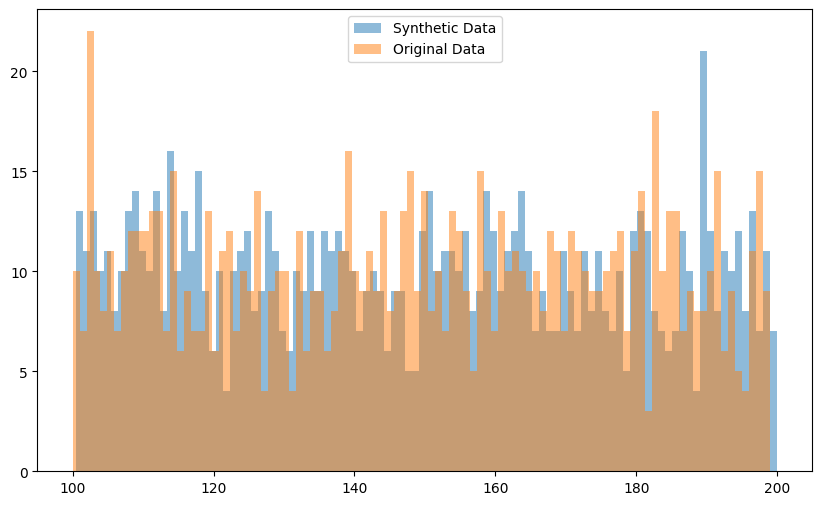

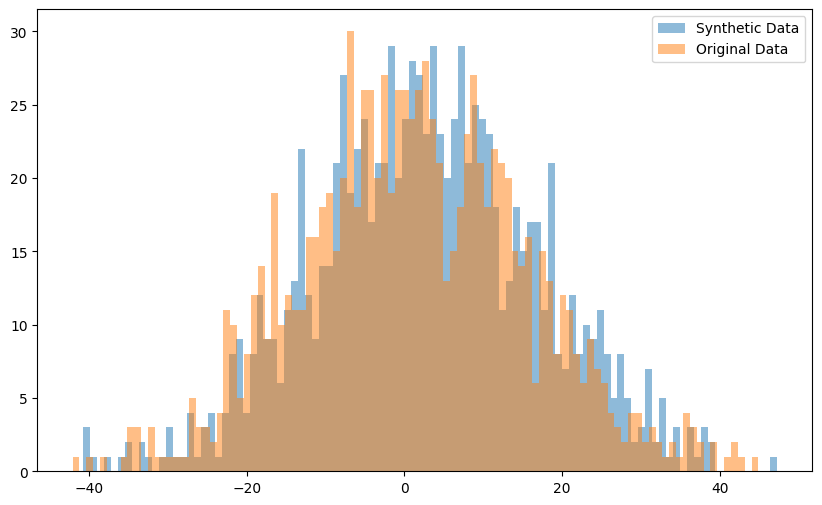

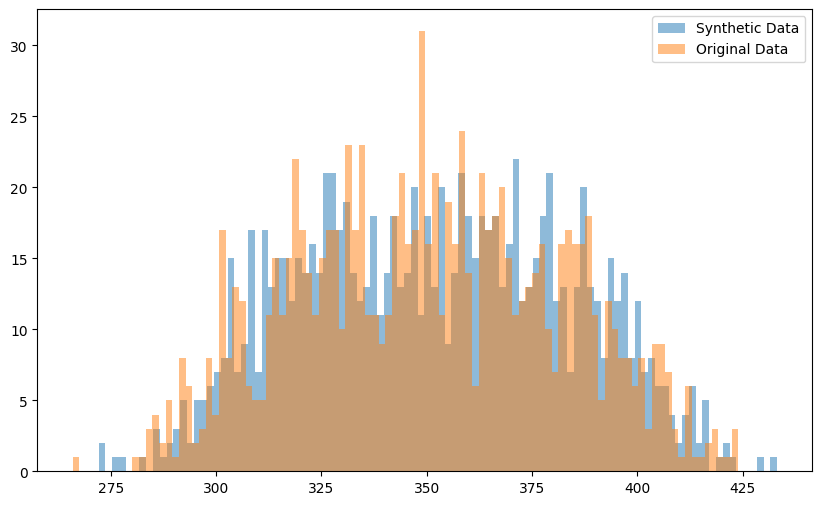

In [ ]:
df = data_generator(1000)

for col in df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[col], bins=100, alpha=0.5, label='Synthetic Data')
    plt.hist(raw[col], bins=100, alpha=0.5, label='Original Data')
    plt.legend()
    plt.show()

# 1.4

Confidence: 7

Conduct statistical tests to check if the synthetic data is statistically similar to the original data

H0: The synthetic data is statistically similar to the original data
H1: The synthetic data is statistically different from the original data

In [ ]:
# Implement linear regression model
model_raw = sklearn.linear_model.LinearRegression()
model_sim = sklearn.linear_model.LinearRegression()

model_raw.fit(raw[['col1', 'col2']], raw['col3'])
model_sim.fit(df[['col1', 'col2']], df['col3'])

# Store the coefficients
# For the raw data
raw_coef1 = model_raw.coef_[0]
raw_coef2 = model_raw.coef_[1]
raw_intercept = model_raw.intercept_

# For the synthetic data
sim_coef1 = model_sim.coef_[0]
sim_coef2 = model_sim.coef_[1]
sim_intercept = model_sim.intercept_

# Hypothesis testing
z_score_coef1 = (raw_coef1 - sim_coef1) / np.sqrt(np.var(raw['col1']) / len(raw['col1']) + np.var(df['col1']) / len(df['col1']))
z_score_coef2 = (raw_coef2 - sim_coef2) / np.sqrt(np.var(raw['col2']) / len(raw['col2']) + np.var(df['col2']) / len(df['col2']))
z_score_intercept = (raw_intercept - sim_intercept) / np.sqrt(np.var(raw['col3']) / len(raw['col3']) + np.var(df['col3']) / len(df['col3']))

# Calculate p-values
p_value_coef1 = stats.norm.cdf(z_score_coef1)
p_value_coef2 = stats.norm.cdf(z_score_coef2)
p_value_intercept = stats.norm.cdf(z_score_intercept)

For each coefficient, I created an independent hypothesis test. Since we are testing if the simulated dataset is statistically similar to the raw dataset, H0 is $\beta_i - \beta_i' = 0$ ($\beta_i'$ refers to the simulated dataset's linear regression coefficient).

In [21]:
print(f"Coefficient 1: {raw_coef1}, Simulated Coefficient 1: {sim_coef1}, Z-score: {z_score_coef1}, P-value: {p_value_coef1}")
print(f"Coefficient 2: {raw_coef2}, Simulated Coefficient 2: {sim_coef2}, Z-score: {z_score_coef2}, P-value: {p_value_coef2}")
print(f"Intercept: {raw_intercept}, Simulated Intercept: {sim_intercept}, Z-score: {z_score_intercept}, P-value: {p_value_intercept}")


Coefficient 1: 0.9999999999999996, Simulated Coefficient 1: 0.9999999999999999, Z-score: -2.561851995279701e-16, P-value: 0.4999999999999999
Coefficient 2: 1.0000000000000007, Simulated Coefficient 2: 0.9999999999999997, Z-score: 1.560953003702913e-15, P-value: 0.5000000000000007
Intercept: 200.00000000000003, Simulated Intercept: 200.0, Z-score: 2.00940698297313e-14, P-value: 0.500000000000008


Since the p-value are all around 0.5, we fail to reject the null hypothesis for 95% confidence level. Therefore the simulated data is statistically similar to the original data.

# 2

Confidence: 7

In [ ]:
import requests
from bs4 import BeautifulSoup
import json  # Added for parsing the data-meetings string

# Web Scraping

# 1. Define the target URL and use a session
url = "https://hooslist.virginia.edu/1262/Group/DataScience"
session = requests.Session()

# Use cookie to bypass the security check
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36",
    "Cookie": "_ga_WVEW83W2Q4=GS1.1.1740347880.1.1.1740347896.44.0.0; _ga_L3YS6XMJSR=GS2.1.s1756206139$o1$g1$t1756206889$j54$l0$h0; _ga_DXG6LYM0TQ=GS2.1.s1756206139$o1$g1$t1756206889$j54$l0$h0; _ga_NFFRKJ3WQ0=GS2.1.s1756587313$o2$g0$t1756587316$j57$l0$h0; _ga_1D8P2XJ63E=GS2.1.s1757033199$o1$g0$t1757033199$j60$l0$h0; _ga_V5DDQZY532=GS2.1.s1758567624$o2$g0$t1758567624$j60$l0$h0; _ga_DJ3DEHKXND=GS2.1.s1761276464$o1$g1$t1761277121$j60$l0$h0; nmstat=8f2f0b58-da10-666d-684e-3fb997c485ae; _ga_BR8TQSBJZ3=GS2.1.s1762673198$o5$g0$t1762673199$j59$l0$h0; _ga_NKCXRFTE2N=GS2.1.s1763958319$o1$g1$t1763958347$j32$l0$h0; _ga_ER5K1PSP1F=GS2.1.s1763958319$o1$g1$t1763958347$j32$l0$h0; _ga_6VB7VGZ714=GS2.1.s1765491526$o1$g0$t1765491527$j59$l0$h0; _ga_QZEYNCKO7P=GS2.1.s1770525867$o47$g0$t1770525871$j56$l0$h0; _ga_QZEYNCK07P=GS2.1.s1770525867$o56$g0$t1770525871$j56$l0$h0; cf_clearance=cWWowWTo529C.MkhPtLoxnKU4MYf2M19Kc_T6jJb4BQ-1771875500-1.2.1.1-gZhk.dYp9qPgIW6nTm1VRSZOecRfdgozxRqooN5SWfLXZIvMdMTREMk1G2F2SgTn0xmLGHojOc606aPJ6xJ6clSgyOQXSqTw._t.mfdI8UCQu4e2PkISMaof3P13i9Tw_srhQ55NfhZpXUZi.0G.ixwl.1yvFojTbIUPAJWT6z8xwo31La3Le1Ri.EFzVrcVrFK7RWetlUNkQ3qQHJ1Pyi.ZcFr8FuB4luvqpV5JKEs; _gcl_au=1.1.422166123.1771875536; _uetvid=3c34ab2094d511f0957b33a4869e3752; _ga_NSB0YFP7QY=GS2.1.s1771875504$o2$g1$t1771876103$j60$l0$h0; _ga_R9WJEBQJW7=GS2.1.s1771875536$o4$g0$t1771876103$j60$l0$h0; _ga_DNNPH2LM2E=GS2.1.s1771875536$o4$g0$t1771876103$j60$l0$h975026543; _ga=GA1.2.1979347585.1770163242; _ga_RW662ML7Y6=GS2.1.s1771958041$o26$g0$t1771958044$j57$l0$h0; _ga_JWP8JHLNQF=GS2.1.s1771958041$o26$g0$t1771958044$j57$l0$h0; .AspNetCore.Session=CfDJ8FClZYHGhexEvnQYExhLWKiKR61AmubzGRwY51Gm49pvrFJwe7Hn07YrI%2BOiefznwA1UsO5zyiMtXdrNIbaN0ObtnG2fxebTkV%2F3Zpd%2BVIRGpyb%2BoSA9n8eI8BL2x5UrG6AnQ6OqsojELzi0XTblNAuf3iY1RRun2wV6xj9x2Ydt; ARRAffinity=2959c48350784f43f424c238333c19440e8cfd8369dfb83ba81b925f448568f1; ARRAffinitySameSite=2959c48350784f43f424c238333c19440e8cfd8369dfb83ba81b925f448568f1; .AspNetCore.Cookies=CfDJ8FClZYHGhexEvnQYExhLWKiJtDypvvYKQIbV05oP917sG2o9iH2nZjEQRYEq-hphf7-oE7C7wdJeRTZdcwn7AcwVjkY1rAcNxgYNm44HXZC_9ndo1tPqPvGImhlpifBtEtKA10t0jWe3mjwh5uIJN3l2AihmdZ-KaXxxcTgs8n3D6Ivqq7hDWWhuLK9x-NZISBFAmpv7WlY8we3z-YgUd6oYY0QhaHs_R5WNno6d5nMX8tf4X0uuaOZ0v-xmJm212ocmpI_NjJIlPUOVrYQ7cdztTKP3QVlNT-Q71paMTDVpNDvEp8iGkK6-ToHzeIRCFLT0OuTTNGynLvSXkT7Mntsg8t7up1jbfRzcjfnSJPJIMSJQW351UWZGirAFhg-IbJH8KVXJcqEWFiJReeSSa9DZdJ7iBi0x-1lkeHJ2qv_lMtsdQDuVGjHQgLjd14yPY9fzIkvdrZ0HPYSYR6j0De9ipjUT9p4lcSlfFE9Q8BJSwBy2oe9WtlPCzRvbBiordyFMipMNQJRXYQah7gtoozq84JF_EX_O80DAYBwstLb2i43UcTOGS7EtFKCSSuI8gZIrYdq2wjSCkey7J1wlbsTU3Q-ujEcX2gYGkX8U_vsb823q4ik4CUeQ2fhHMyPLtZZ85VnypqT-OVcPg_vn7DmNI7OfzisW5_He4E9b0mH9sOuyh8dHMVg2ywQBtnKseLWBohjQpsouUEkUR68FqtxCJimHXjTCnv2Sh6gEm1tDXZRo4vqvQ9DkV9dnLVT6hW10J1OIzM699mae_7_m6wF0y9zE5vwG6e_TnoBavUTF6P05P8rU6tjA2mILR_oULYC781NQhegWuHvAkkZhodJix9mwQBQJYc7RDWkut1IdONXQFwLgPpmkx0M14ue-2kQbutlUnLTd9T_bTIwPFhRG9u1Fxke9AETTErqy-WLkClCChEfNyepK2EYgbDSXpJrErBlK0OQisQ5W32l6dP4wvEAhwn2VMRmwERfaFauOTb-LpfiXoDcAFLp3H4dJ9VaqYYKic_Tu2uMyJNJgdZkUUz0SIo6Qb2bK46Put-MkyE4m9zoe264dFLrzSthhVU5b1FnzuDIcefQsyNWP1Uyq2iFUkv7ePlm8by6FNM7fwMvM4LloNiI_UIJC-EeGYEWBOgWfV359vScVEjTEE7xsnLunkTmsO2mZTQS64t15X1QhzcihTKecyNGIoORGbi_9tfETEusNkC173IkuIhqChTYLoMCWPd9Wn7PRfcLBKjltgBSy5amtR-uvNsNOYy7tXqugAGsX-vAGI_b24-65Px4Ce8Qm0bnJ--SGGOddx3Uj37I7jbJr0u0y40JhudDsbeF4LGfKoRUok2BuJGmU82I6vlOGmHN5Wjw2CLpSC1n46U38WLbepcY8l-Qck6Wr_Mn1YgB3RbV0d6pq97HRmuPOGvClkbyc3JM8NmvPyupl2dKREmWKWBndm4ewmnOtSzrJN6nGxdeg5BGhPFkkelv-xIhFsHJeMy8az9Qmrd3W4abzQE7pnj1N3WwgFKb0fT1A0ZHKdTyFkrb2F12hlSNZZnwLT7ZXv3Imu7wLwZjCx2SFOlZeSZpiYeKOvnm9BA6Q9iiPaVHlpSQrsqttENpXty5ZYG_5LZCtyO757TTxnw1srtBJ1-IDbu2a1mKF71W7Pr__5FWwCH5Rxi5haNSgm-GCAJgrM03cwD7bS3Agt97ghbLv_V9jlDDijuZPn3oP_RcUdooZigGX4n6hXuTstcU8-4WGzKJ_8j57omsx2JHJx3lrWn3ax1X8aQpew7KlYyi5dqn0VCXfGgGrpZB3rPfxgmyidR15yw1U-KRBcD3Io8cGO2G48GjMaZ8qYfdBmTMQUU4utokk0s3PchOVoaJzp7yLSH6C8LDL1n3BzBDJCFuTNiY3mGIJFXe0UoM83Cwig1p6sBpkxxlbh1bOmNBA5yGelFrV997JRMfLNB70jRgYI2UnpnXgnfePyZFL-NEedOyJF183S9b1tA1q10yxC8g6n8yqr7teTIAK7KKEIEgaTIG9vwDXmggUy-9-7yUGgpZaPa3EiKfW2JagjXd2iEsIkjVa22duLYHuyIj5G01Rml5g_QPGgVLUNWRUvwikVEHsV5o-VV7huEDnZPjXw-FDCeeLlMXDyqaZ3ELYpuDAByMdw-iiCdCXukdjxjONZm1P58JCf6YkREMYsTIwI9X6h1JcWAzxzcGlVkC8bc8MExFmuwr8vULi-F8DGNZ8UuScg_2xjfgD5dWG6ela53S9Ft5dzTc8ig7SLmlg5Ts3UZGF7YpBwiQ-oBRGN1cDhs3h7m0B_3sEogCzxpyL_EN-DlOw4HB86sNwYHoGKvzd69RBwKfCON40BZJG9LXHQv7CV7effg8FxcmqXmnqdWRUloQTZocgskIzV8SnYqpoUg6FZBU-WckqRsP95zwQkkweIDDTnpql3RGyRszuuGObceKebtuZkrTgJWJd7viAowpfgllttvTyIUi8MrxGjgxCnWlv4_t7SHPEwPfVmzB6jpq6xGKphOLRTASTIMRbnNJ68X7jxKCwR--mKSZELDoqJqiJN7qZZrIePCU-C_bA5NipxJJY4G-gTVDy5Ge_ye60kqqDNRcJ0wv0oY1yNeu55SpzZuJCsF0AcmWjdkkEQOnF8WDi3pQ3afd5L9dlI96l0LYsFHR8uoeXhKsC9ImkhEQ9-78i_iA4SJ3fCZR6y7NhP0ExuilVIVVXPiobyCCptsMNtOODnqnZJKfdN7tzL1cBYctPss9vLWE6X1Yc_WyA9HHP4nexBXxxMwRyGjC0aB_Takg_ZFkDu77DMV3GsTOneOVol8vVBMsJGK8UWh8TB1f6lWz70httNqq38RuIKVe1Azi7gWKKdTgLkyroEC0isz_TZWw0HpF7iyQeIuz28cjL"
}
response = session.get(url, headers=headers)

# 2. Parse the HTML
soup = BeautifulSoup(response.content, 'html.parser')
# print(f'soup: {soup}')

# 3. Find all section links 
section_links = soup.find_all('a', class_='js-section-link')
print(section_links)

# 4. Extract fields for Course Mnemonic, Course Title, Instructor, Room, Day(s) of the week, Start time, End time
# Course Mnemonic: data-subject
# Course Title: data-title
# Instructor: data-instructors
# Room: data-location
# Day(s) of the week: data-meetings
# Start time: data-meetings
# End time: data-meetings

rows = []
for link in section_links:
    
    # Json parsing
    raw_meetings = link.get('data-meetings')
    days, start_time, end_time = None, None, None
    
    if raw_meetings:
        try:
            meetings_json = json.loads(raw_meetings)
            if len(meetings_json) > 0:
                days = meetings_json[0].get('days')
                start_time = meetings_json[0].get('start')
                end_time = meetings_json[0].get('end')
        except json.JSONDecodeError:
            pass
            
    rows.append({
        'class_number': link.get('data-classnumber'),
        'title': link.get('data-title'),
        'instructors': link.get('data-instructors'),
        'subject': link.get('data-subject'),
        'section': link.get('data-sectioncode'),
        'catalog': link.get('data-catalog'),
        'term': link.get('data-term'),
        'meeting_days': days,
        'start_time': start_time,
        'end_time': end_time,
        'location': link.get('data-location'),
        'enrollment': link.get('data-enrollment'),
    })

print(f'rows: {rows}')

# 5. Load into Pandas
df = pd.DataFrame(rows)
df.to_csv('course_sections.csv', index=False)

Found 169 section links
rows: [{'class_number': '15256', 'title': 'Foundation of Data Science', 'instructors': 'Brian Wright', 'subject': 'DS', 'section': '100', 'catalog': '1001', 'term': 'Spring 2026', 'meeting_days': 'Mo|We', 'start_time': '02:00 PM', 'end_time': '03:15 PM', 'location': 'Nau Hall 101(On Grounds)', 'enrollment': '153 / 240 '}, {'class_number': '15257', 'title': 'Foundation of Data Science', 'instructors': 'Ali Rivera', 'subject': 'DS', 'section': '101', 'catalog': '1001', 'term': 'Spring 2026', 'meeting_days': 'Fr', 'start_time': '02:00 PM', 'end_time': '02:50 PM', 'location': 'Data Science Building Room 206(On Grounds)', 'enrollment': '40 / 40 '}, {'class_number': '15296', 'title': 'Foundation of Data Science', 'instructors': 'TBD', 'subject': 'DS', 'section': '102', 'catalog': '1001', 'term': 'Spring 2026', 'meeting_days': 'Fr', 'start_time': '12:00 PM', 'end_time': '12:50 PM', 'location': 'Data Science Building Room 206(On Grounds)', 'enrollment': '27 / 40 '}, {'c

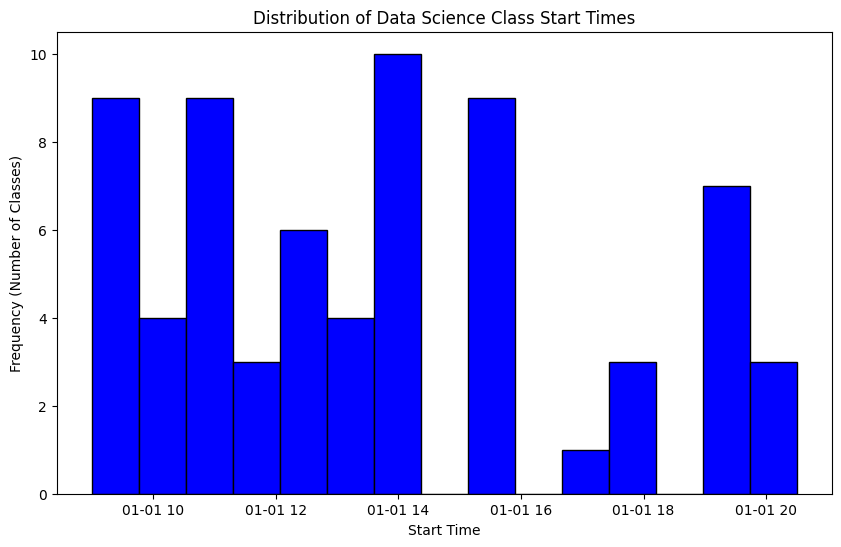

In [41]:
import matplotlib.dates as mdates

# Convert strings to datetime objects
# format='%I:%M %p' tells Pandas to expect "12-hour:Minute AM/PM"
df['start_datetime'] = pd.to_datetime(df['start_time'], format='%I:%M %p')

# Create the histogram
plt.figure(figsize=(10, 6))

# Plot the datetime objects
plt.hist(df['start_datetime'], bins=15, color='blue', edgecolor='black')

# Add labels for clarity
plt.title('Distribution of Data Science Class Start Times')
plt.xlabel('Start Time')
plt.ylabel('Frequency (Number of Classes)')

plt.show()

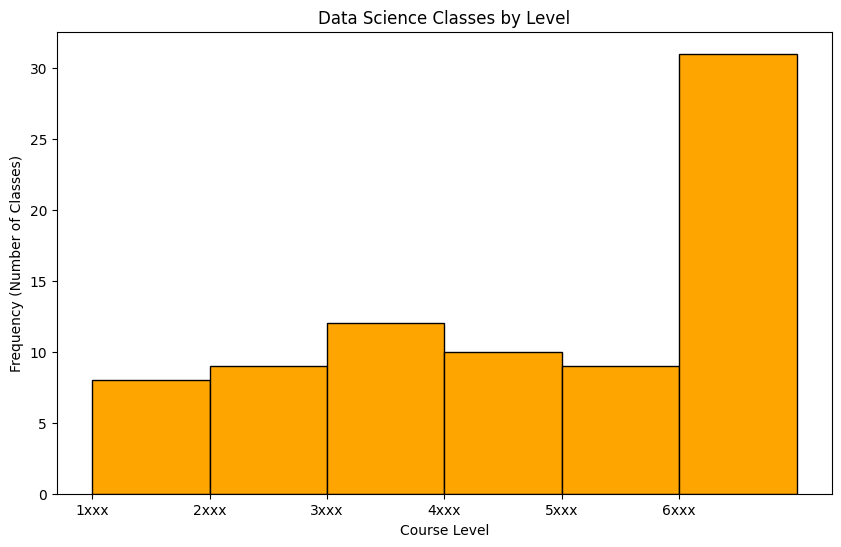

In [42]:
# Convert the catalog column to numeric
df['catalog_num'] = pd.to_numeric(df['catalog'])

# Create the histogram
plt.figure(figsize=(10, 6))

# Create custom bins 
# A bin of [1000, 2000) will catch everything from 1000 to 1999 (the 1xxx level courses)
# A bin of [2000, 3000) will catch everything from 2000 to 2999 (the 2xxx level courses), etc.
custom_bins = [1000, 2000, 3000, 4000, 5000, 6000, 7000]

plt.hist(df['catalog_num'], bins=custom_bins, color='orange', edgecolor='black')

# Format the chart to match the assignment requirements
plt.title('Data Science Classes by Level')
plt.xlabel('Course Level')
plt.ylabel('Frequency (Number of Classes)')

# Force the x-axis ticks to display as '1xxx', '2xxx', etc. 
plt.xticks(custom_bins[:-1], labels=['1xxx', '2xxx', '3xxx', '4xxx', '5xxx', '6xxx'])

plt.show()

### Data Dictionary: Data Science Classes (Spring 2026)

This dataset contains information regarding all currently listed Data Science (DS) courses at UVA for Spring 2026. 

- class_number (String): The unique 5-digit SIS registration number for the specific course section (e.g., "15256").

- title (String): The official title/name of the course (e.g., "Foundation of Data Science").

- instructors (String): The name(s) of the professor(s) teaching the section.

- subject (String): The primary course mnemonic or department code (e.g., "DS").

- section (String): The specific section code for the course (e.g., "100", "001").

- catalog (String): The 4-digit course level identifier (e.g., "1001", "2002").

- term (String): The internal university system code indicating the academic semester.

- meeting_days (String): The day(s) of the week the class is held (e.g., "Mo|We", "Tu|Th").

- start_time (String): The designated start time of the class (e.g., "02:00 PM").

- end_time (String): The designated end time of the class (e.g., "03:15 PM").

- location (String): The physical building and room number where the class meets.

- enrollment (String): The current registration status, formatted as "Current Enrollment / Total Capacity".

# 3

Confidence: 7

In [46]:
import zipfile

with zipfile.ZipFile("synthea_sample_data_csv_apr2020.zip", 'r') as zip_ref:
    zip_ref.extractall("synthea_sample_data_csv_apr2020")

In [43]:
import duckdb

In [45]:
conn = duckdb.connect('synthea.db')

conn.close()